In [1]:
import numpy as np
import matplotlib 
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class plot_func():
    def __init__(self, data, clr, name):
        fig = plt.figure(1)
        ax = fig.add_subplot(111)
        ax.plot(range(1,len(data)+1),data,color=clr,label=name)
        ax.legend(loc='upper left')
        #ax.set_xbound(-1,10)
        #ax.set_ybound(1,100)
        ax.set_xlabel('Number of elements')
        ax.set_ylabel('Value')


In [3]:
def make_zeroes(n):
    m = []
    for i in iter(n):
        m.append(0)
    return m


In [4]:
def add_anomaly(num,x):
    t_num = make_zeroes(num)
    num.sort()
    mean = np.mean(num)
    mu = len(num)/2 - 1
    last_idx = len(num)
    delta = 1.0 + (x/100)
    for j in iter(num):
        #share = num[num.index(j)] * delta
        share = delta
        increment = j * delta
        if num.index(j) == mu:
            t_num[num.index(j)] = j * delta
            print delta, j, t_num[num.index(j)], increment
        #elif num.index(j) < mu:
            #t_num[num.index(j)] = j +(j*delta* (1 - (mu-num.index(j))/mu))
        else:
            t_num[num.index(j)] = j + (( j * delta ) -j )* (1 - abs(mu-num.index(j))/mu)
            #t_num[num.index(j)] = num[num.index(j)] + delta * (1 - (mu-num.index(j))/(mu - last_idx))
    return t_num     

In [5]:
def add_anomaly_2(num):
    t_num = make_zeroes(num)
    num.sort()
    mean = np.mean(num)
    diff = mean
    first_ele = num[0]
    for k in iter(num):
        if k == mean:
            t_num[num.index(k)] = mean + diff
        elif k < mean:
            t_num[num.index(k)] = num[num.index(k)] + (diff * (1 - ( (mean - num[num.index(k)]) / (mean - num[0]) )))
        else:
            t_num[num.index(k)] = num[num.index(k)] + (diff * (1 - ( (mean - num[num.index(k)]) / (mean - num[-1]) )))
            #t_num[num.index(k)] = num[num.index(k)]
    return t_num
            
            

In [6]:
def add_anomaly_3(num):
    t_num = make_zeroes(num)
    num.sort()
    mean = np.mean(num)
    diff = 2 * mean
    first_ele = num[0]
    for k in iter(num):
        if k == mean:
            t_num[num.index(k)] = mean - diff
        elif k < mean:
            t_num[num.index(k)] = num[num.index(k)] - (diff * (1 - ( (mean - num[num.index(k)]) / (mean - num[0]) )))
        else:
            t_num[num.index(k)] = num[num.index(k)] - (diff * (1 - ( (mean - num[num.index(k)]) / (mean - num[-1]) )))
            #t_num[num.index(k)] = num[num.index(k)]
    return t_num

In [7]:
sample_data = [952, 335, 216, 912, 732, 777, 139, 176, 215, 99]
sample_data.sort()
#sample_data = np.random.rand(10)
anomaly_data = add_anomaly(sample_data,100.0)
anomaly2_data = add_anomaly_2(sample_data)
anomaly3_data = add_anomaly_3(sample_data)

2.0 216 432.0 432.0


In [8]:
mu = len(sample_data)/2 - 1
mu

4

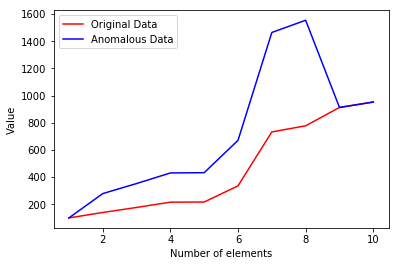

In [9]:
test1 = plot_func(sample_data,'red','Original Data')
test2 = plot_func(anomaly_data,'blue','Anomalous Data') 

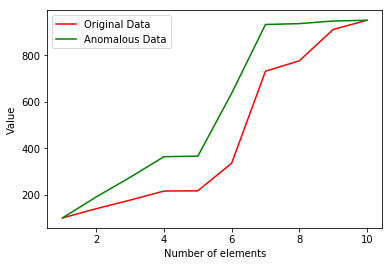

In [10]:
test3 = plot_func(sample_data,'red','Original Data')
test4 = plot_func(anomaly2_data,'green','Anomalous Data') 

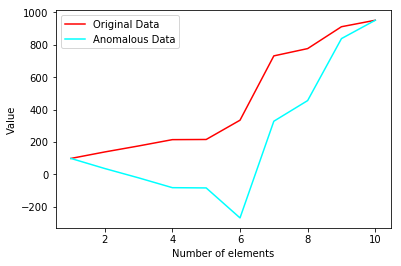

In [11]:
test3 = plot_func(sample_data,'red','Original Data')
test4 = plot_func(anomaly3_data,'cyan','Anomalous Data') 

In [12]:
sample_data.sort()

In [13]:
sample_data

[99, 139, 176, 215, 216, 335, 732, 777, 912, 952]